In [109]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import brentq
from matplotlib.ticker import FixedFormatter


import Semester_Project.functions 

In [24]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [131]:
def test_func(x):
    f0 = 1.2 # Hz
    return 0.9 * np.sin(2 * np.pi * f0 * x)

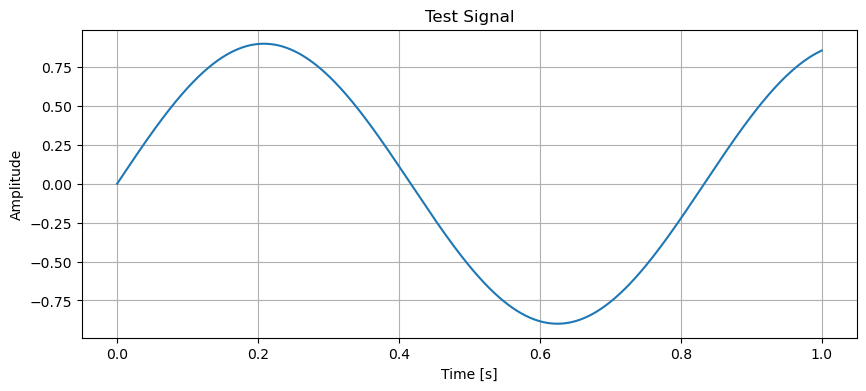

In [132]:
stop_time = 1
x= np.linspace(0, stop_time, 1000) #time vector 

plt.plot(x, test_func(x))
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Test Signal')
plt.grid()

0.2


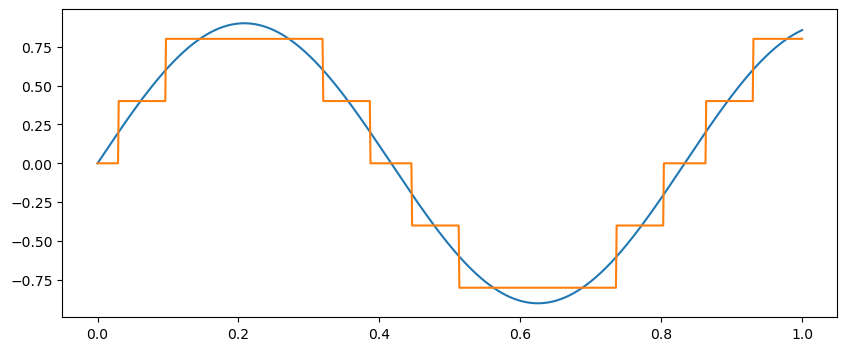

In [133]:
q = quantizer(5)
step = q.step
print(q.qthreshold(2,3))

plt.rcParams["figure.figsize"] = (10,4)
plt.plot(x, test_func(x))
plt.plot(x, q.quantize(test_func(x)));



Transition instants: [0.         0.02972127 0.09678314 0.31988353 0.3869454  0.44638794
 0.5134498  0.7365502  0.80361206 0.8630546  0.93011647]
Bins index: [2 3 4 3 2 1 0 1 2 3 4]
Quantization values: [ 0.   0.4  0.8  0.4  0.  -0.4 -0.8 -0.4  0.   0.4  0.8]


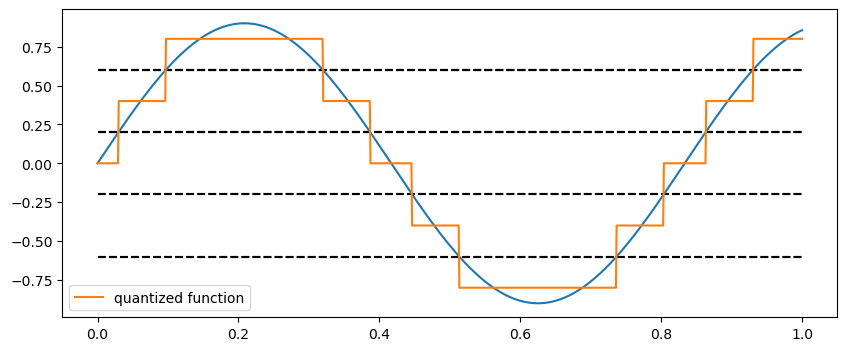

In [134]:
T = int(stop_time)

# transitions and bins
t, q_idx = amplitude_sampler(test_func, T, q)

# bins to quantization values
a = q.qvalue(q_idx)  #--> find the step y value for each bin 

print('Transition instants: {}'.format(t))
print('Bins index: {}'.format(q_idx))
print('Quantization values: {}'.format(a))

for i in range(0,len(q_idx)-1): 
    plt.hlines(q.qthreshold(q_idx[i],q_idx[i+1]), 0, 1,'black', linestyles='dashed', label='')

plt.plot(x, test_func(x));
plt.plot(x, q.quantize(test_func(x)), label='quantized function')
plt.legend()

In [136]:
Nqbits = 3; 

binary_idx = np.zeros(len(q_idx))
binary_list = []

def binary_encoding(bin_idx, Nqbits):
    for i in range(0,len(binary_idx)):
        # Convert to binary string, removing the '0b' prefix
        # Fill with zeros to have a fixed length of Nqbits

        binary_str = bin(bin_idx[i])[2:].zfill(Nqbits) 
        binary_list.append(binary_str)

def bit_extract(bi_list, idx):
    return  [bits[idx] for bits in bi_list]



binary_encoding(q_idx, Nqbits)

print('Bins index: {}'.format(q_idx))
print('Binary encoding: {}'.format(binary_list))
print('Least significant bit: {}'.format(bit_extract(binary_list, -1)))
print('Most significant bit (for 3 qbits): {}'.format(bit_extract(binary_list, 0)))
print('Middle bit (for 3 qbits): {}'.format(bit_extract(binary_list, 1)))


Bins index: [2 3 4 3 2 1 0 1 2 3 4]
Binary encoding: ['010', '011', '100', '011', '010', '001', '000', '001', '010', '011', '100']
Least significant bit: ['0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0']
Most significant bit (for 3 qbits): ['0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1']
Middle bit (for 3 qbits): ['1', '1', '0', '1', '1', '0', '0', '0', '1', '1', '0']


In [137]:
msb = [int(b) for b in bit_extract(binary_list, 0)]
lsb = [int(b) for b in bit_extract(binary_list, -1)]
middle = [int(b) for b in bit_extract(binary_list, 1)]

In [157]:
t_round = np.round(t, 3)
t_round = np.append(t_round, 1)
t_range = np.arange(0, 1 + 0.001, 0.001, dtype=float)

lsb_plot = np.zeros(len(t_range))
msb_plot = np.zeros(len(t_range))
middle_plot = np.zeros(len(t_range))


for i in range(len(lsb)):
    if lsb[i] == 1:
        lsb_plot[int(t_round[i]*1000) : int(t_round[i+1]*1000)] = 1
    if msb[i] == 1: 
        msb_plot[int(t_round[i]*1000) : int(t_round[i+1]*1000)] = 1
    if middle[i] == 1: 
        middle_plot[int(t_round[i]*1000) : int(t_round[i+1]*1000)] = 1


In [158]:
bit_waves = np.vstack([msb_plot,  middle_plot, lsb_plot])

Text(0.5, 1.0, 'Binary encoding of the quantized signal')

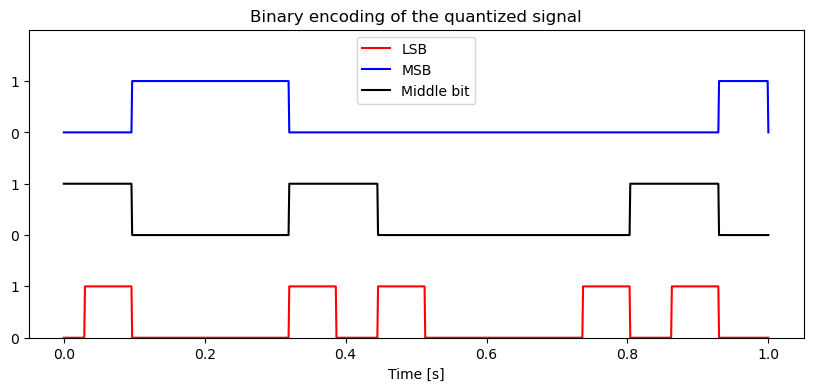

In [159]:
plt.plot(t_range, lsb_plot, 'red', label='LSB')
plt.plot(t_range, msb_plot+4, 'b', label='MSB')
plt.plot(t_range, middle_plot+2, 'black', label='Middle bit')
y_tick_labels = ['0', '1', '0', '1', '0', '1']
plt.yticks([0,1,2,3,4,5], y_tick_labels)
plt.legend()
plt.xlabel('Time [s]')
plt.ylim(0,6)
plt.title('Binary encoding of the quantized signal')



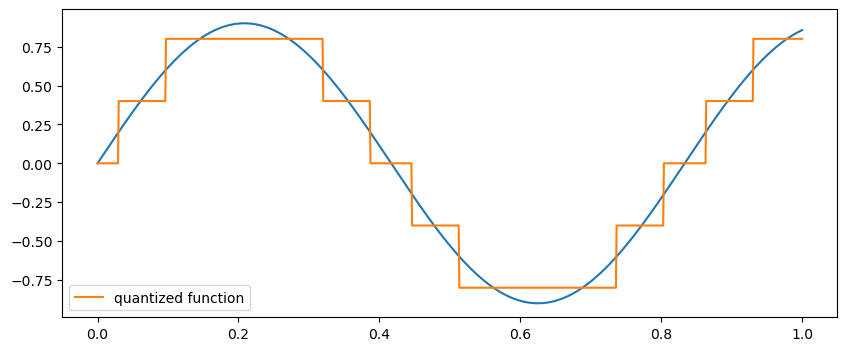

In [140]:
plt.plot(x, test_func(x));
plt.plot(x, q.quantize(test_func(x)), label='quantized function')
plt.legend()

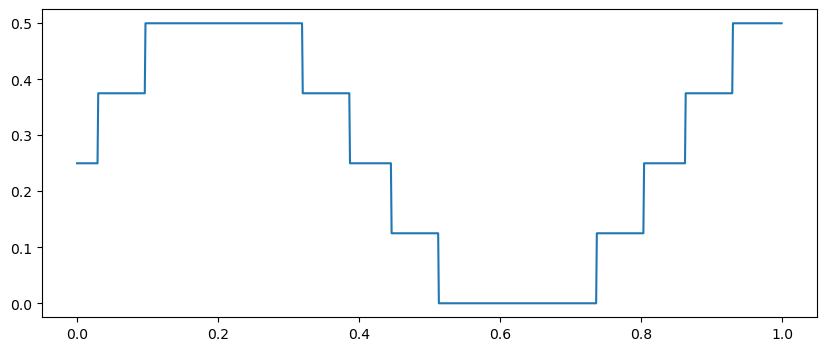

In [162]:
q_tot = 0
for i in range(1,np.shape(bit_waves)[0]+1):

    q_temp = 2**(-i)*bit_waves[i-1,:]
    q_tot = q_tot + q_temp

plt.plot(t_range[:-1], q_tot[:-1])